In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

<bound method Figure.show of <Figure size 1200x400 with 10 Axes>>


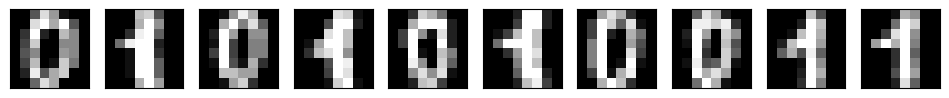

In [4]:
#data load
# Load the digits dataset with two classes
digits,target = dt.load_digits(n_class=2,return_X_y=True)
fig,ax = plt.subplots(nrows=1, ncols=10,figsize=(12,4),subplot_kw=dict(xticks=[], yticks=[]))

print(fig.show) #1200x400, the number of data is 10.
# Plot some images of digits
for i in np.arange(10):
    ax[i].imshow(digits[i,:].reshape(8,8),cmap=plt.cm.gray)   
plt.show()

In [7]:
#Using MSE for gradient descent
# Input argument is weight and a tuple (train_data, target)
def grad_mse(w,xy):
    (x,y) = xy
    (rows,cols) = x.shape
    
    # Compute the output
    o = np.sum(x*w,axis=1)
    diff = y-o
    diff = diff.reshape((rows,1))    
    diff = np.tile(diff, (1, cols))
    grad = diff*x
    grad = -np.sum(grad,axis=0)
    return grad

# Input argument is weight and a tuple (train_data, target)
def mse(w,xy):
    (x,y) = xy
    
    # Compute output
    # keep in mind that we're using mse and not mse/m
    # because it would be relevant to the end result
    o = np.sum(x*w,axis=1)
    mse = np.sum((y-o)*(y-o))
    mse = mse/2
    return mse   

In [34]:
#Opimizer is Stochastic_gradient_descent 
# (xy) is the (training_set,target) pair
def stochastic_gradient_descent(max_epochs,threshold,w_init,
                                obj_func,grad_func,xy,
                                learning_rate=0.05,batch_size = 32):
    (x_train,y_train) = xy
    w = w_init
    w_history = w
    f_history = obj_func(w,xy)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    rows = x_train.shape[0]
    
    # Run epochs
    while  i<max_epochs and diff>threshold:
        # Shuffle rows using a fixed seed to reproduce the results
        np.random.seed(i)
        p = np.random.permutation(rows)
        
        # Run for each mini-batch in training set 
        # SGD : wt = w(t-1) + learning_late*1/n*gradient(function)
        for batch_start in range(0, rows, batch_size):
            batch_indices = p[batch_start:batch_start + batch_size]
            x_batch, y_batch = x_train[batch_indices], y_train[batch_indices]
            batch_gradient = np.zeros_like(w)
            
            # Compute gradient for the mini-batch
            for x, y in zip(x_batch, y_batch):
                batch_gradient += grad_func(w, (np.array([x]), y))
            batch_gradient /= len(batch_indices)  # Average gradient for the mini-batch

            delta_w = -learning_rate * batch_gradient
            w += delta_w

            
        i+=1
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,xy)))
        diff = np.absolute(f_history[-1]-f_history[-2])
        
    return w_history,f_history

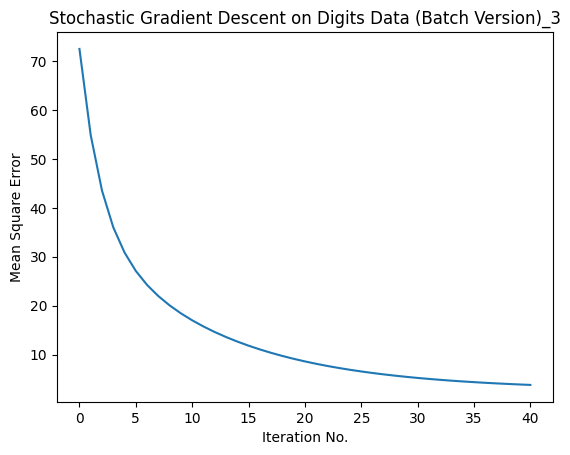

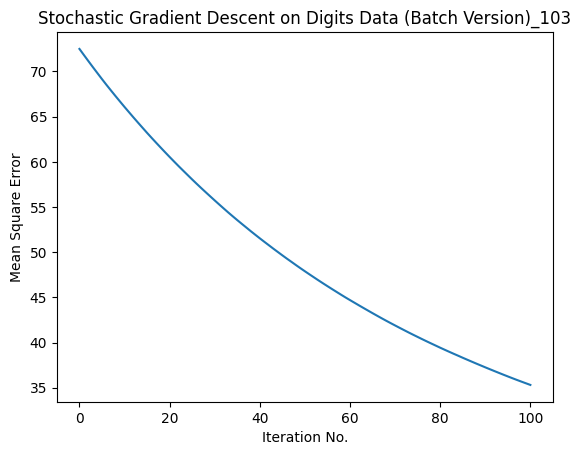

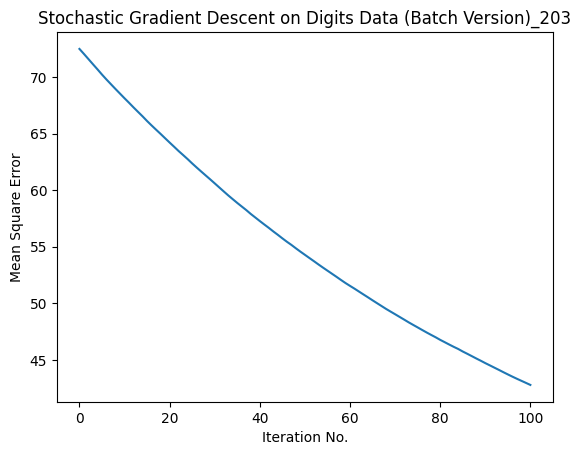

In [35]:
# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
                        digits, target, test_size=0.2, random_state=10)

# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

#batch size 3, 103, 203
for i in range(3):
    # Initialize the weights and call gradient descent
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-1,1,x_train.shape[1])*.000001
    w_history,mse_history = stochastic_gradient_descent(100,0.1,w_init,
                                  mse,grad_mse,(x_train,y_train),
                                 learning_rate=1e-6, batch_size=(i*100+3))

    # Plot the MSE
    plt.plot(np.arange(mse_history.size),mse_history)
    plt.xlabel('Iteration No.')
    plt.ylabel('Mean Square Error')
    plt.title('Stochastic Gradient Descent on Digits Data (Batch Version)_%d' %(i*100+3))
    plt.show()


In [116]:
#Optimizer is Stochastic gradient descent with momentum
#Formula is mt = m*m(t-1) - learning_late*gradient funciton(wt)
#wt+1 = wt + mt
# m is Optimal parameter.
def SGD_momentum(max_epochs, threshold, w_init,
                                    obj_func, grad_func, xy,
                                    learning_rate=0.05, momentum=0.8, m = 0):
    (x_train, y_train) = xy
    w = w_init
    w_history = [w]
    f_history = [obj_func(w, xy)]
    delta_w = np.zeros_like(w)
    i = 0
    diff = 1.0e10
    rows = x_train.shape[0]
    
    # Run epochs
    while i < max_epochs and diff > threshold:
        # Shuffle rows using a fixed seed to reproduce the results
        np.random.seed(i)
        p = np.random.permutation(rows)
        
        # Run for each instance/example in training set
        for x,y in zip(x_train[p,:],y_train[p]):
            #Calcurate gradient and delta update current parameter only w.
            gradient = grad_func(w, (np.array([x]), y))
            delta_w = m*momentum*delta_w - learning_rate*gradient
            w += delta_w
            
        i += 1
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,xy)))
        diff = np.absolute(f_history[-1]-f_history[-2])
        
    return w_history, f_history

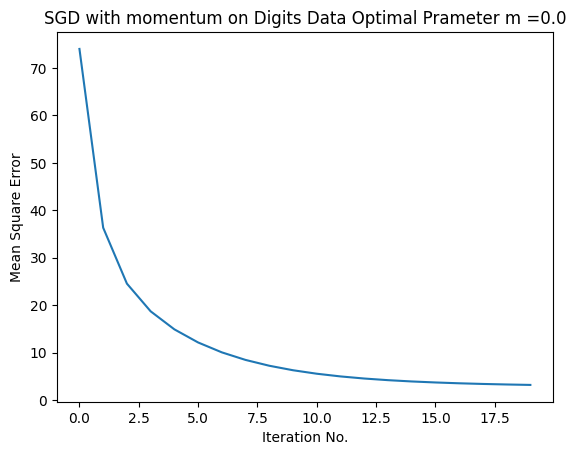

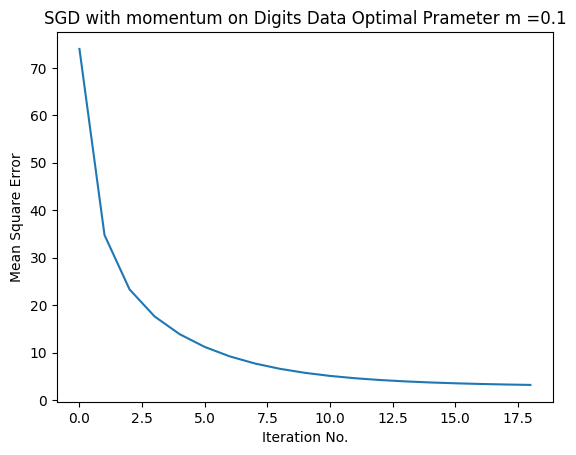

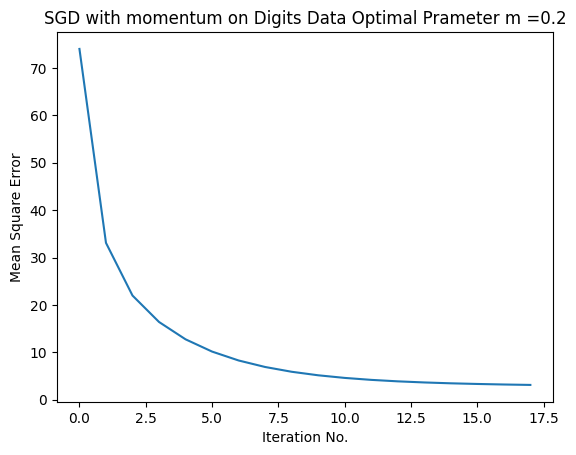

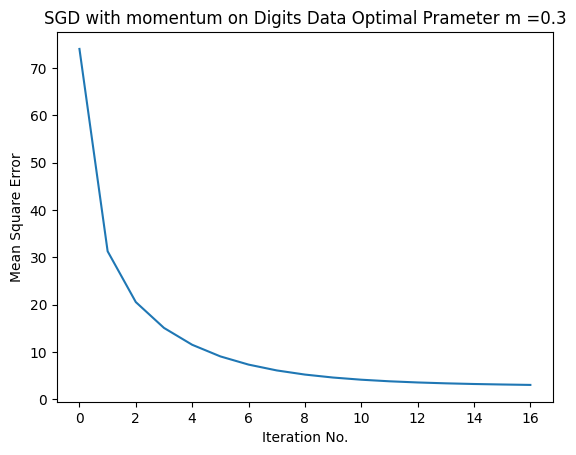

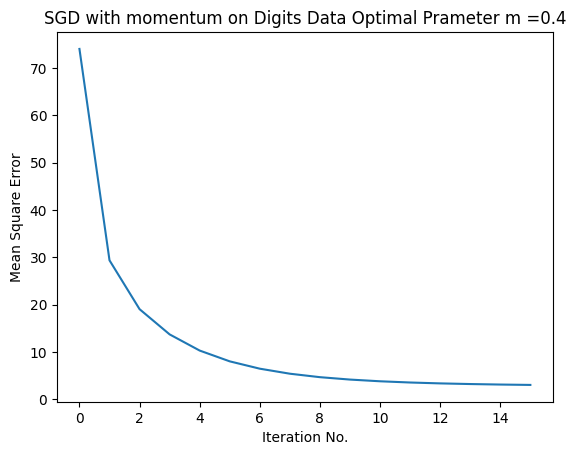

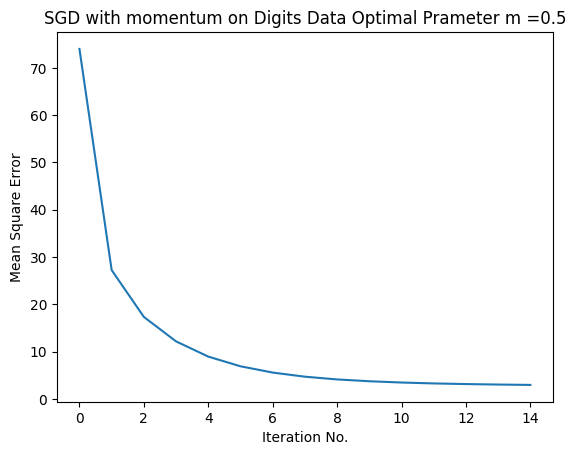

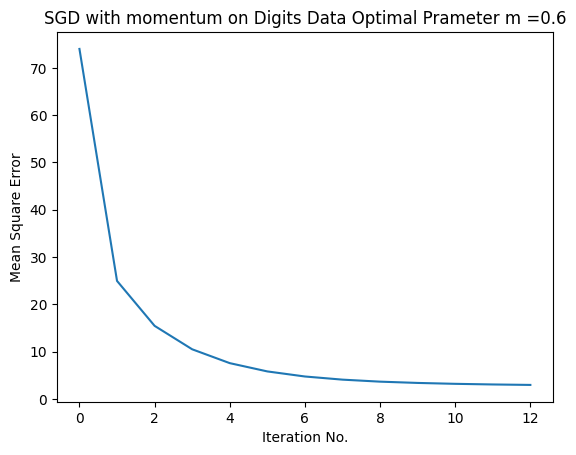

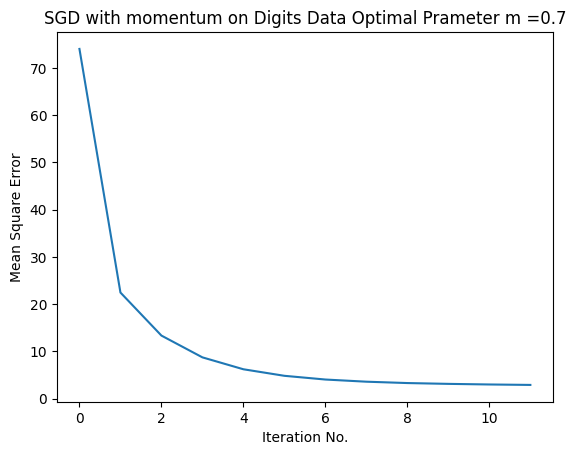

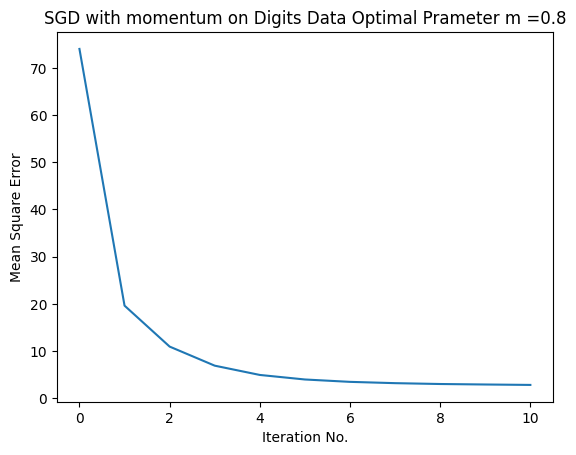

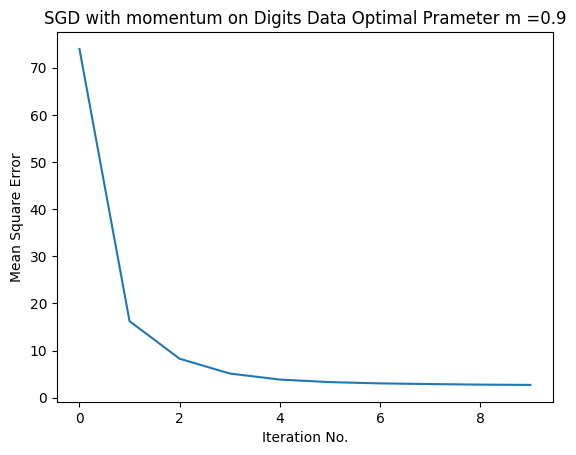

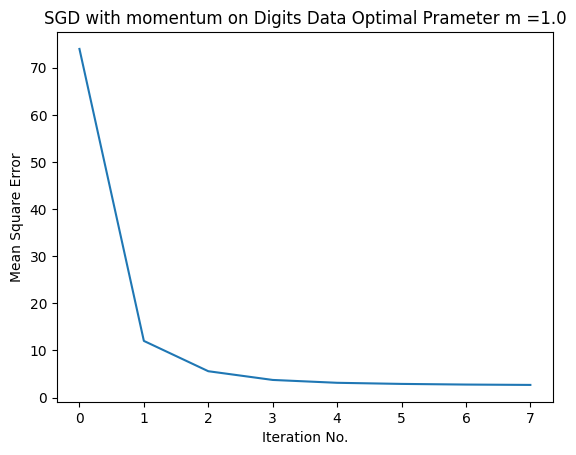

In [117]:
# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
                        digits, target, test_size=0.2, random_state=11)

# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

# m parameter 0~1 linspace : 0.1

for i in range(11):
    # Initialize the weights and call gradient descent
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-1,1,x_train.shape[1])*.000001
    w_history,mse_history = SGD_momentum(100,0.1,w_init,
                                  mse,grad_mse,(x_train,y_train),
                                 learning_rate=1e-6,momentum=0.8, m=i/10)

    # Plot the MSE
    plt.plot(np.arange(mse_history.size),mse_history)
    plt.xlabel('Iteration No.')
    plt.ylabel('Mean Square Error')
    plt.title('SGD with momentum on Digits Data Optimal Prameter m =%.1f' % (i/10))
    plt.show()


In [106]:
#Optimizer is Nestrov`s Accelerated Gradient(NAG)
# m is Optimal parameter.
def NAG(max_epochs, threshold, w_init,
        obj_func, grad_func, xy,
        learning_rate=0.05, momentum=0.8, m = 0):
    (x_train, y_train) = xy
    w = w_init
    w_history = [w]
    f_history = [obj_func(w, xy)]
    delta_w = np.zeros_like(w)
    i = 0
    diff = 1.0e10
    rows = x_train.shape[0]
    
    # Run epochs
    while i < max_epochs and diff > threshold:
        # Shuffle rows using a fixed seed to reproduce the results
        np.random.seed(i)
        p = np.random.permutation(rows)
        
        # Run for each instance/example in training set
        for x,y in zip(x_train[p,:],y_train[p]):
            # Estimate next position using momentum
            next_w = w - m * momentum*delta_w 
            # Compute gradient at next position (newt_w + m*momentum)
            gradient = grad_func((next_w+m * momentum*delta_w), (np.array([x]), y))
            # Update momentum to modify delta_w
            delta_w = m*momentum*delta_w + learning_rate * gradient
            # Update weights
            w -= delta_w

        i += 1
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,xy)))
        diff = np.absolute(f_history[-1]-f_history[-2])
        
    return w_history, f_history

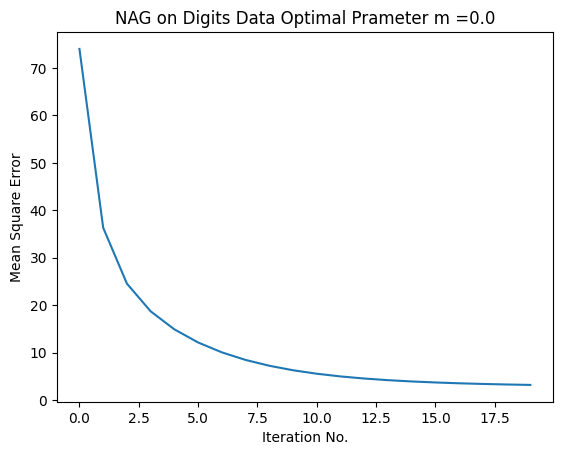

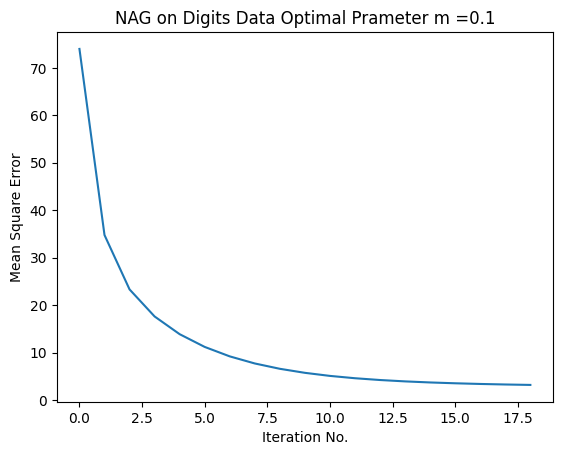

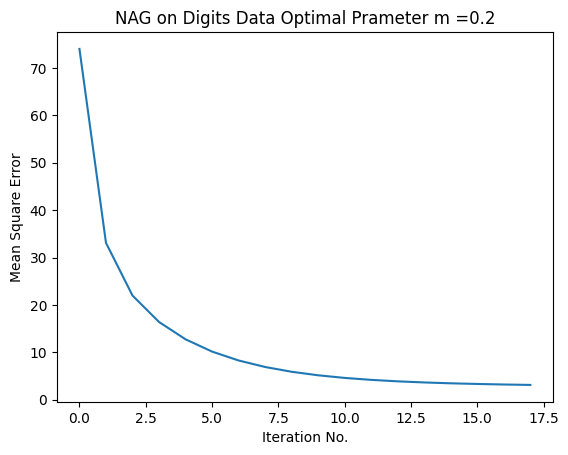

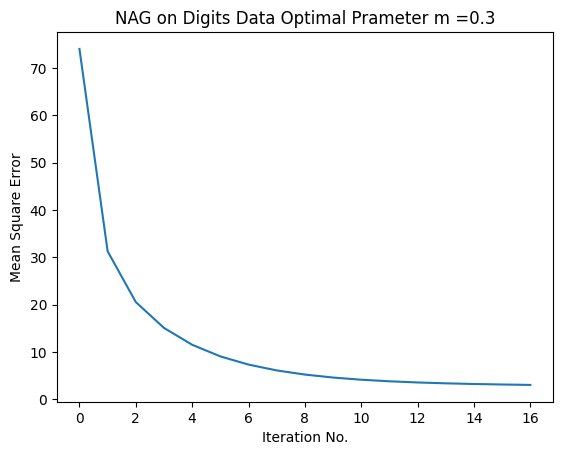

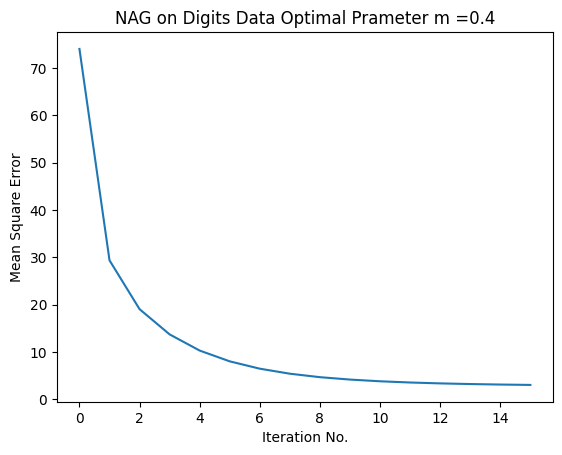

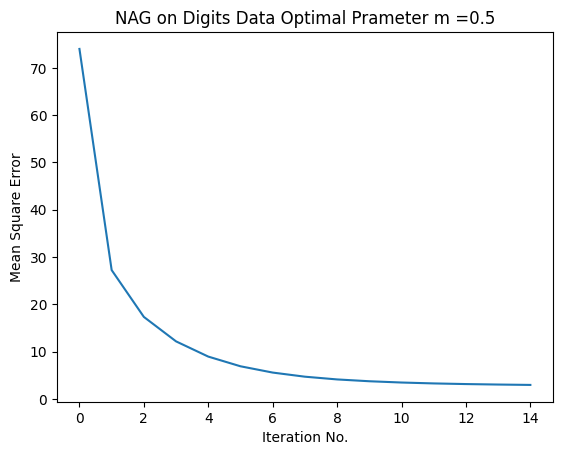

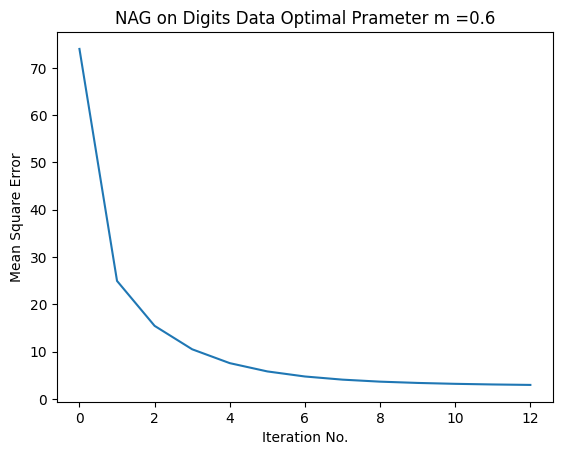

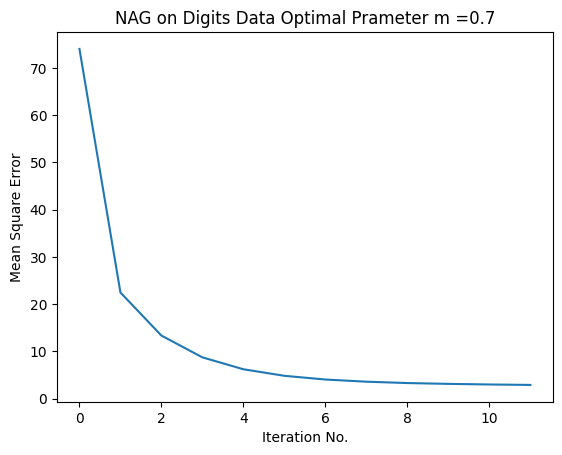

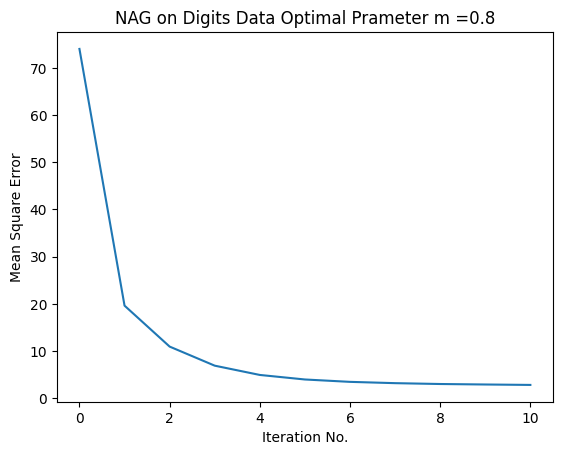

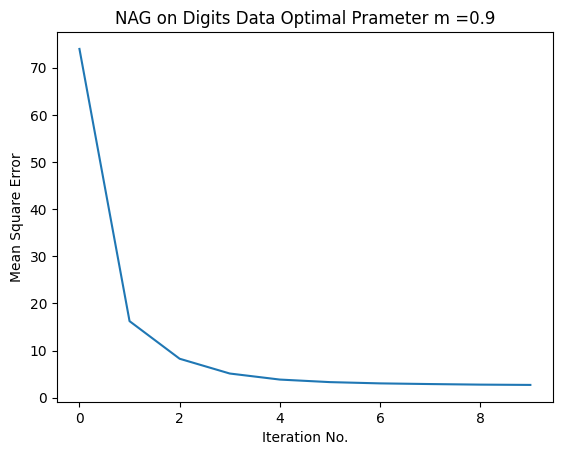

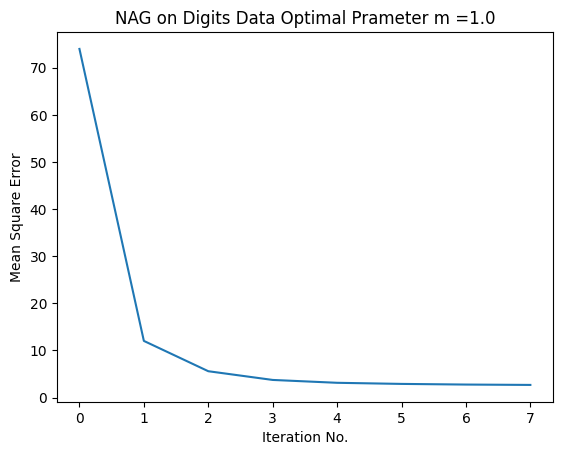

In [107]:
# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
                        digits, target, test_size=0.2, random_state=11)

# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

# m parameter 0~1 linspace : 0.1
for i in range(11):
    # Initialize the weights and call gradient descent
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-1,1,x_train.shape[1])*.000001
    w_history,mse_history = NAG(100,0.1,w_init,
                                  mse,grad_mse,(x_train,y_train),
                                 learning_rate=1e-6,momentum=0.8, m=i/10)

    # Plot the MSE
    plt.plot(np.arange(mse_history.size),mse_history)
    plt.xlabel('Iteration No.')
    plt.ylabel('Mean Square Error')
    plt.title('NAG on Digits Data Optimal Prameter m =%.1f' % (i/10))
    plt.show()


In [ ]:
#Optimal parameter m is 1